In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from scipy.ndimage import gaussian_filter

In [3]:
def apply_clahe(image, clip_limit, tile_grid_size=(10, 10)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(image)
    clahe_image = clahe_image.astype(np.uint8)
    clahe_image = np.expand_dims(clahe_image, axis = 2)
    return clahe_image

def normalization(image_path, gauss=False, gauss_sigma=1, clahe=True, clahe_clip_limit=4.0, eps=10**-5):

    image = fits.getdata(os.path.join(image_path), memmap=False)
    len, wid = image.shape
    img = np.empty([len, wid, 1], dtype=np.uint8)
    image = np.nan_to_num(np.log10(image-np.amin(image)+eps), neginf=eps)

    if gauss:
      image = gaussian_filter(image, sigma=gauss_sigma)

    max_im = np.amax(image)
    max_dtype = np.iinfo(np.uint8).max
    coeff = max_dtype/max_im
    image *= coeff
    img[:,:,0] = image

    if clahe:
      img = apply_clahe(img, clip_limit=clahe_clip_limit)
    return img

In [4]:
im1 = '/content/sumGRB220306B_AbAO_R.fit'
im2 = '/content/sumGRB220430A_AbAO_R.fit'
im3 = '/content/sumGRB221009A_AbAO_R.fits'
im4 = '/content/GRB230216A_230220_Mondy_60x60_sum_R.fit'
im5 = '/content/GRB230328_20230328_Mondy_AZT_33IK_5x120_sum_R.fits'
im6 = '/content/GRB230409B_230409_Mondy_60x26_sum_R.fit'

# Train CLAHE

mean: 74.21627044677734
mean CLAHE: 99.13858795166016
mean: 79.69622802734375
mean CLAHE: 102.63666534423828
mean: 82.82275390625
mean CLAHE: 106.07878112792969


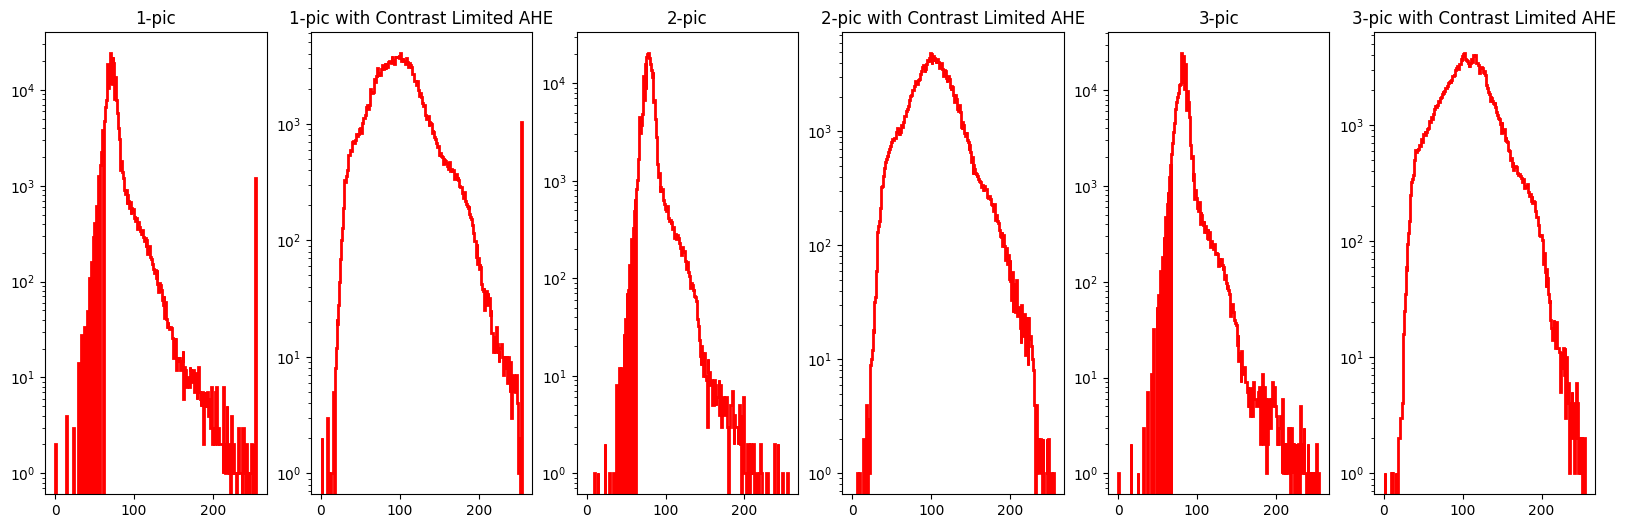

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(20, 6), sharex='col')
for i, j in enumerate(random.sample(dataset_markups['train'], 3)):
    img = normalization(j["file_name"])
    bins = 256
    rng=(0,255)
    axs[2*i].hist(img.flatten(), histtype="step", bins=bins, log=True, color="r", lw=2, zorder=1,range=rng);
    axs[2*i].set_title(f'{int(2*i/2)+1}-pic')
    axs[2*i+1].hist(apply_clahe(img).flatten(), histtype="step", bins=bins, log=True, color="r", lw=2, zorder=1,range=rng);
    axs[2*i+1].set_title(f'{int(2*i/2)+1}-pic with Contrast Limited AHE')
    print(f'mean: {img.mean()}')
    print(f'mean CLAHE: {apply_clahe(img).mean()}')

# AbAO CLAHE

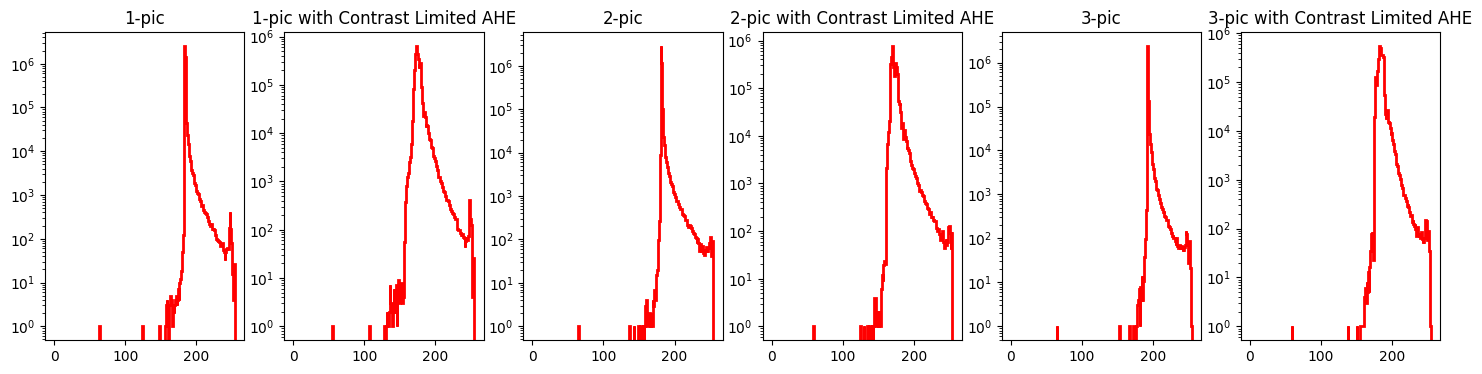

In [14]:
fig, axs = plt.subplots(1, 6, figsize=(18, 4), sharex='col')

for i, j in enumerate([im1,im2,im3]):
    img = normalization(j, clahe=False)
    bins = 256
    rng=(0,255)
    axs[2*i].hist(img.flatten(), histtype="step", bins=bins, log=True, color="r", lw=2, zorder=1,range=rng);
    axs[2*i].set_title(f'{int(2*i/2)+1}-pic')
    axs[2*i+1].hist(apply_clahe(img, clip_limit=5).flatten(), histtype="step", bins=bins, log=True, color="r", lw=2, zorder=1,range=rng);
    axs[2*i+1].set_title(f'{int(2*i/2)+1}-pic with Contrast Limited AHE')

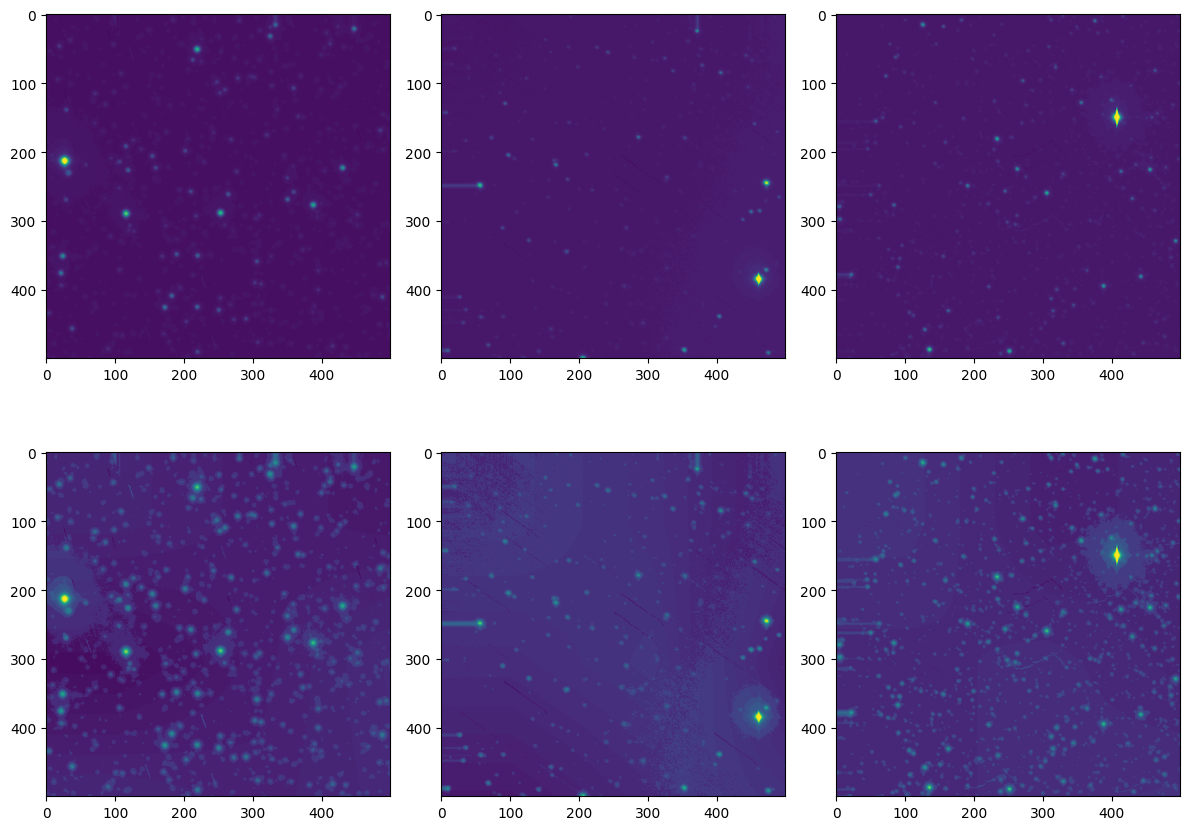

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

for i, j in enumerate([im1,im2,im3]):
      axs[0,i].imshow(normalization(j,clahe=False)[0:500,0:500])
      fig.tight_layout()
      fig.show();
      axs[1, i].imshow(normalization(j, clahe=True, clahe_clip_limit=5)[0:500,0:500]) #[1:10]
      fig.tight_layout()
      fig.show();

# Mondy CLAHE

<ipython-input-3-41b230af2ff0>:13: RuntimeWarning: invalid value encountered in log10
  image = np.nan_to_num(np.log10(image-np.amin(image)+eps), neginf=eps)


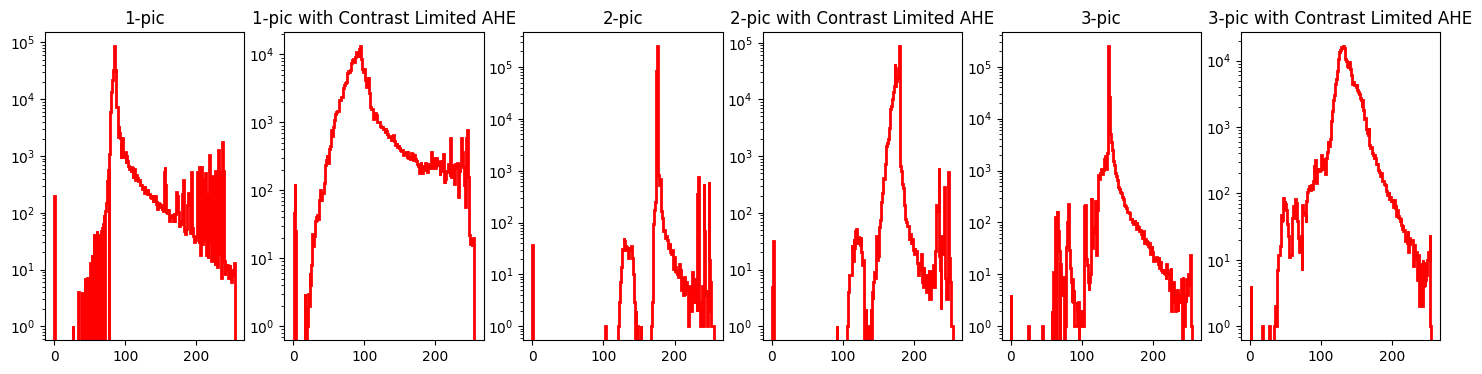

In [17]:
fig, axs = plt.subplots(1, 6, figsize=(18, 4), sharex='col')

for i, j in enumerate([im4,im5,im6]):
    img = normalization(j, clahe=False)
    bins = 256
    rng=(0,255)
    axs[2*i].hist(img.flatten(), histtype="step", bins=bins, log=True, color="r", lw=2, zorder=1,range=rng);
    axs[2*i].set_title(f'{int(2*i/2)+1}-pic')
    axs[2*i+1].hist(apply_clahe(img, clip_limit=5).flatten(), histtype="step", bins=bins, log=True, color="r", lw=2, zorder=1,range=rng);
    axs[2*i+1].set_title(f'{int(2*i/2)+1}-pic with Contrast Limited AHE')

<ipython-input-3-41b230af2ff0>:13: RuntimeWarning: invalid value encountered in log10
  image = np.nan_to_num(np.log10(image-np.amin(image)+eps), neginf=eps)


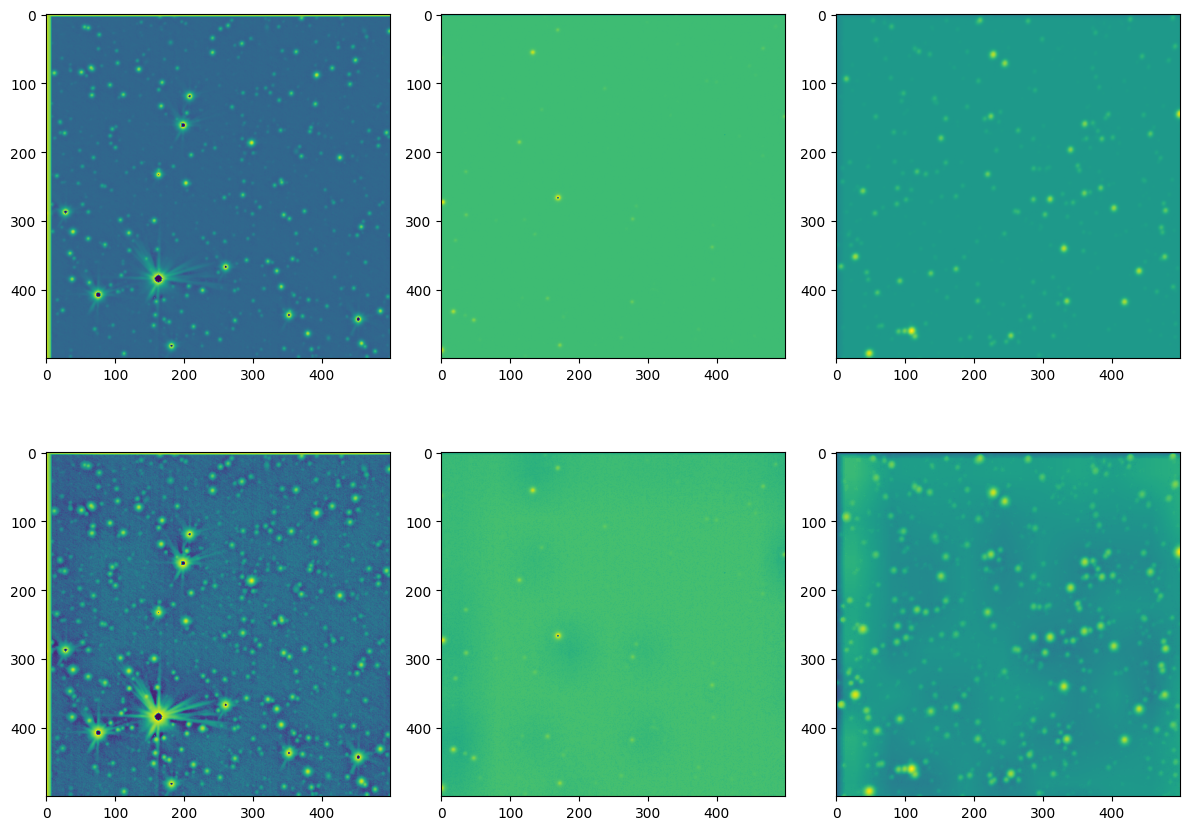

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

for i, j in enumerate([im4,im5,im6]):
      axs[0,i].imshow(normalization(j,clahe=False)[0:500,0:500])
      fig.tight_layout()
      fig.show();
      axs[1, i].imshow(normalization(j, clahe=True, clahe_clip_limit=5)[0:500,0:500]) #[1:10]
      fig.tight_layout()
      fig.show();